In [1]:
import cv2
import matplotlib.pyplot as plt
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil

import numpy as np

from sklearn.metrics import accuracy_score

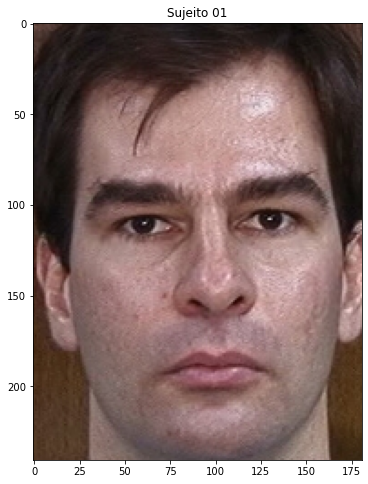

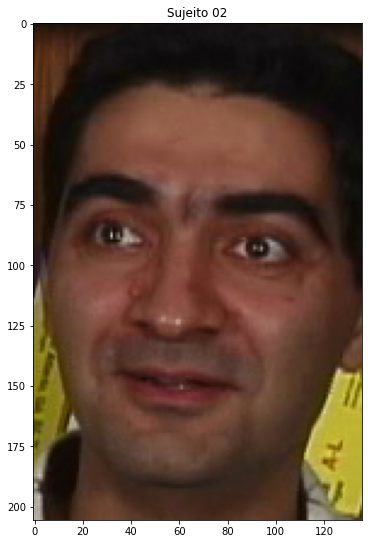

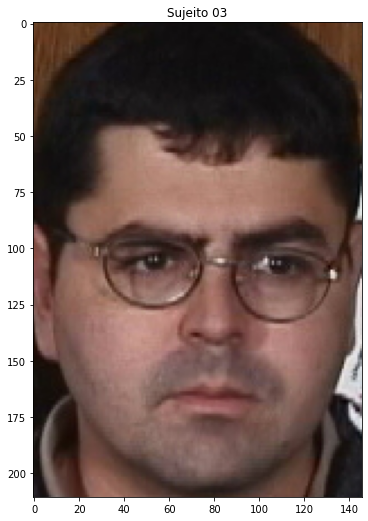

In [2]:
#Imagens já fatiadas para ser análisada e treinada pela IA

imagem_face_1 = cv2.imread("cropped_faces/s01_01.jpg")
imagem_face_1 = cv2.cvtColor(imagem_face_1, cv2.COLOR_BGR2RGB)

imagem_face_2 = cv2.imread("cropped_faces/s02_02.jpg")
imagem_face_2 = cv2.cvtColor(imagem_face_2, cv2.COLOR_BGR2RGB)

imagem_face_3 = cv2.imread("cropped_faces/s03_03.jpg")
imagem_face_3 = cv2.cvtColor(imagem_face_3, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Sujeito 01")
plt.imshow(imagem_face_1)

plt.figure(figsize=(20,10))
plt.subplot(132)
plt.title("Sujeito 02")
plt.imshow(imagem_face_2)

plt.figure(figsize=(20,10))
plt.subplot(133)
plt.title("Sujeito 03")
plt.imshow(imagem_face_3)

plt.show()

In [3]:
imagem_face_1.shape

(241, 181, 3)

In [4]:
imagem_face_2.shape

(206, 136, 3)

In [5]:
imagem_face_3.shape

(211, 146, 3)

In [6]:
#Redimensionando imagens para um tamanho comum

faces_caminho = "cropped_faces/"
lista_arq_faces = [f for f in listdir(faces_caminho) if isfile(join(faces_caminho, f))] 


In [7]:
lista_arq_faces[0]

's01_01.jpg'

In [8]:
len(lista_arq_faces)

750

In [9]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "images/teste/"

if not path.exists(faces_path_treino):
        makedirs(faces_path_treino)
if not path.exists(faces_path_teste):
        makedirs(faces_path_teste)
        
for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]
    
    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)
        

In [10]:
def padronizar_imagem(imagem_caminho):
    imagem  = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
    imagem  = cv2.resize(imagem, (200,200), interpolation=cv2.INTER_LANCZOS4)
    return imagem

In [11]:
list_faces_treino = [f for f in listdir(faces_path_treino) if isfile(join(faces_path_treino, f))]
list_faces_teste = [f for f in listdir(faces_path_teste) if isfile(join(faces_path_teste, f))]

In [12]:
list_faces_treino[0]

's01_01.jpg'

In [13]:
list_faces_teste[0]

's01_11.jpg'

In [14]:
dados_treinamento, sujeitos, dados_teste, sujeitos_teste = [], [], [], []

In [15]:
for i, arq in enumerate(list_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))

In [16]:
len(dados_treinamento)

500

In [17]:
len(sujeitos)

500

In [18]:
sujeito = ""

for i, arq in enumerate(list_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))

In [19]:
len(sujeitos_teste)

250

In [20]:
len(dados_teste)

250

Text(0.5, 1.0, '5')

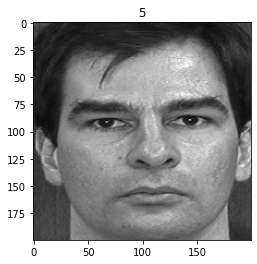

In [21]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])

In [22]:
len(dados_teste)

250

In [23]:
sujeitos = np.asarray(sujeitos, dtype=np.int32)
sujeitos_testes = np.asarray(sujeitos_teste, dtype=np.int32)

In [24]:
modelo_eingenfaces = cv2.face.EigenFaceRecognizer_create()

In [25]:
modelo_eingenfaces.train(dados_treinamento, sujeitos)

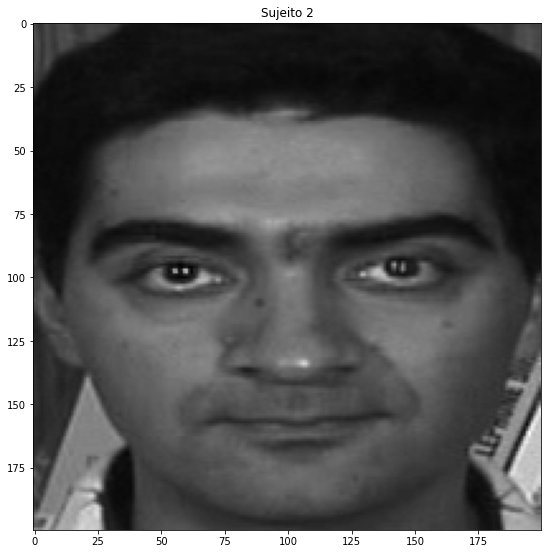

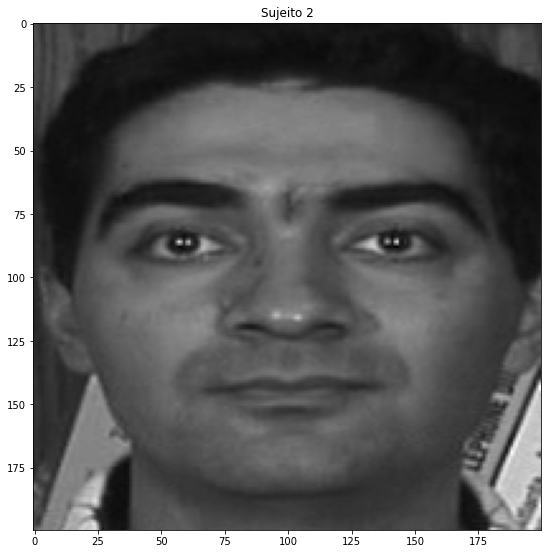

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_testes[6]))
plt.imshow(dados_teste[6], cmap="gray")

plt.figure(figsize=(20,10))
plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_testes[7]))
plt.imshow(dados_teste[7], cmap="gray")

plt.show()

In [28]:
len(dados_treinamento)

500

In [29]:
predicacao = modelo_eingenfaces.predict(dados_teste[19])

In [30]:
predicacao

(4, 3120.608872845703)

In [31]:
modelo_fisherfaces = cv2.face.FisherFaceRecognizer_create()

In [32]:
modelo_fisherfaces.train(dados_treinamento, sujeitos)

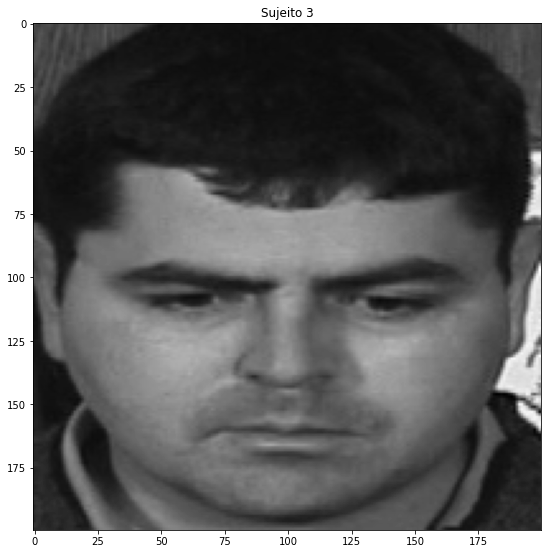

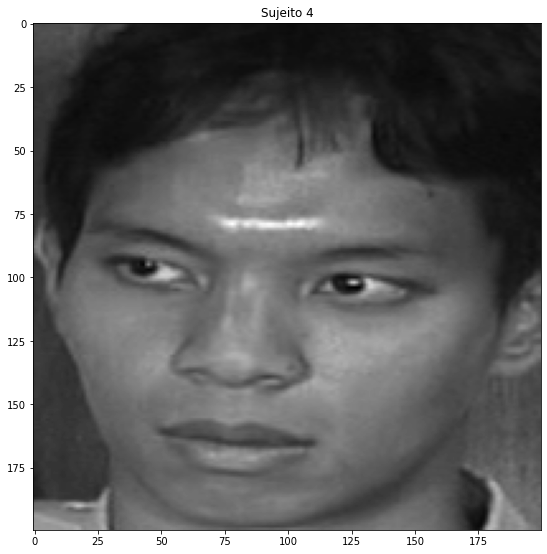

In [33]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_testes[13]))
plt.imshow(dados_teste[13], cmap="gray")

plt.figure(figsize=(20,10))
plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_testes[19]))
plt.imshow(dados_teste[19], cmap="gray")

plt.show()

In [34]:
predicacao

(4, 3120.608872845703)

In [35]:
predicao = modelo_fisherfaces.predict(dados_teste[19])
predicao

(4, 795.1654305178304)

In [36]:
predicao = modelo_fisherfaces.predict(dados_teste[1])
predicao

(1, 808.2884164587447)

In [37]:
predicao = modelo_fisherfaces.predict(dados_teste[25])
predicao

(6, 722.6253010910809)

In [38]:
modelo_lbph = cv2.face.LBPHFaceRecognizer_create()

In [39]:
modelo_lbph.train(dados_treinamento,sujeitos)

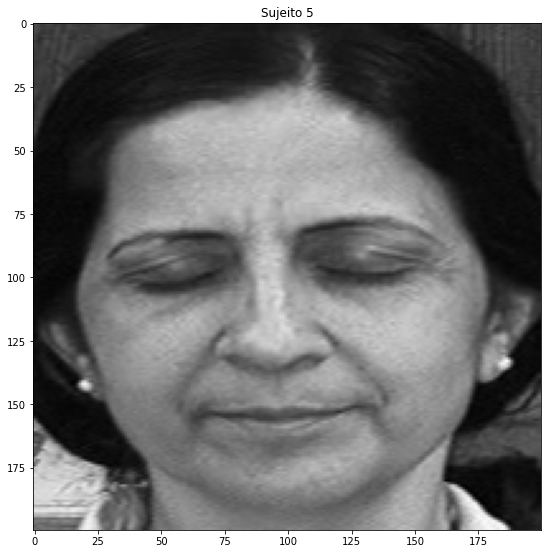

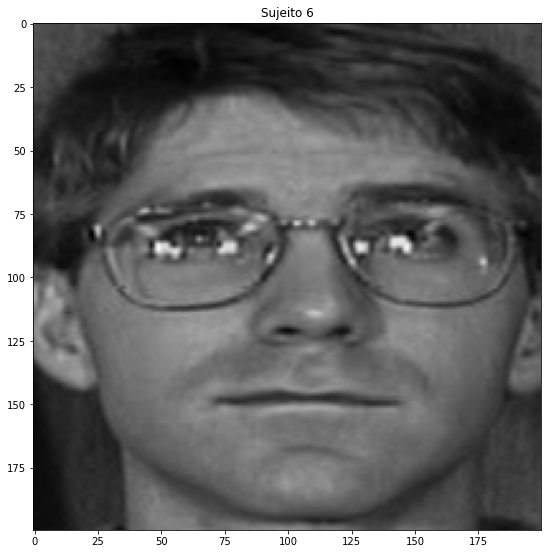

In [40]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.title("Sujeito " + str(sujeitos_testes[21]))
plt.imshow(dados_teste[21], cmap="gray")

plt.figure(figsize=(20,10))
plt.subplot(122)
plt.title("Sujeito " + str(sujeitos_testes[27]))
plt.imshow(dados_teste[27], cmap="gray")

plt.show()

In [41]:
predicao = modelo_lbph.predict(dados_teste[21])
predicao

(5, 32.938584374874814)

In [42]:
#Predizendo com modelo pbph
predicao = modelo_lbph.predict(dados_teste[27])
predicao

(6, 36.49919959564635)

In [43]:
#Indicador de acurância
y_predicoes_eingenfaces = []


In [44]:
for item in dados_teste:
    y_predicoes_eingenfaces.append(modelo_eingenfaces.predict(item)[0])

In [45]:
acuracia_eingenfaces = accuracy_score(sujeitos_teste, y_predicoes_eingenfaces)

In [46]:
acuracia_eingenfaces

0.724

In [47]:
y_pred_fisherfaces = []

In [49]:
for item in dados_teste:
    y_pred_fisherfaces.append(modelo_fisherfaces.predict(item)[0])

In [53]:
acurracia_fisherfaces = accuracy_score(sujeitos_testes, y_pred_fisherfaces)

In [54]:
acurracia_fisherfaces

0.52

In [55]:
y_pred_lbph = []

In [56]:
for item in dados_teste:
        y_pred_lbph.append(modelo_lbph.predict(item)[0])

In [57]:
accuracia_lbph = accuracy_score(sujeitos_teste, y_pred_lbph)

In [58]:
accuracia_lbph

0.792